#점진적인 학습
훈련한 데이터를 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련하는 방식
  
대표적인 점진적 학습 알고리즘으로 ***확률적 경사 하강법***이 있다.
##확률적 경사 하강법
훈련세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려간다. 그 다음 훈련 세트에서 랜덤하게 또 따른 샘플을 하나 선택하여 경사를 조금 내려간다. 이런 식으로 전체 샘플을 모두 사용할 때 까지 계속하는 것이다.
###에포크
확률적 경사 하강버벵서 훈련 세트를 한번 모두 사용하는 과정  
1에포크가 완료되었을 때, 만족할만한 위치에 도달하지 못했다면 도달할 때 까지 메포크를 수행한다.
###미니배치 경사 하강법
한번에 여러개의 샘플을 사용하여 경사 하강법을 수행하는 방식
###배치 경사 하강법
한번에 전체 샘플을 사용하여 경사로를 딸 이동하는 방법




---
##손실 함수
어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준  
손실 함수의 값이 작을 수록 좋음
4개의 샘플만 존재한다면  정확도는 0, 0.25, 0.5, 0.75, 1로 5개만 존재한다. 하지만 정확도의 값은 연속적이어야 한다. 따라서 로지스틱 손실함수를 사용하여 연속적으로 만든다.
##로지스틱 손실함수
예측값과 타깃값을 곱한 것을 음수로 바꾸어 손실 함수로 사용  
음수값이 1과 가까울수록 좋은 모델으로 판단함  
타깃이 1(양성 클래스)인 경우는 그대로 타깃값을 곱함  
타깃이 0(음성 클래스)인 경우는 예측값을 1에서 뺀 후 1로 곱함  
  
  
이때 로그 함수를 사용하여 구할 수도 있음  
타깃 = 1일때 : -log(예측확률)   --> 아주 큰 양수  
타깃 = 0일때 : -log(1-예측확률)   -->아주 작은 양수


#SGDClassifier


데이터 전처리

In [3]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [5]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

SGDClassifier 클래스 임포트하고 훈련하기  
이때 max_iter는 수행할 에포크 횟수의 지정이다.

In [12]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


새로운 SGdClassifier 객체를 만들지 않고 훈련한 모델을 추가하려면 partial_fit 메소드를 사용한다.  
이전보다 정확도가 향상되었음을 알 수 있다.

In [13]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


##에포크와 과대/과소 적합
확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다.  
에포크 회수가 적으면 모델이 훈련세트를 덜 학습하게 된다. 에포크 횟수가 충분히 많다면 훈련 세트에 잘 맞는 모델이 될것이다. 하지만 너무 많이 훈련한 모델은 과대적합된 모델이 될 가능성이 높다.
###조기종료
과대적합이 시작하기 전에 훈련을 멈추는 것이다.

In [18]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)
##훈련 세트와 테스트 세트에 대한 점수를 기록하기 위한 2개의 배열 준비

In [19]:
for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  train_score.append(sc.score(test_scaled, test_target))
##300번의 에포크동안 훈련을 반복하여 각각의 리스트에 추가한다.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


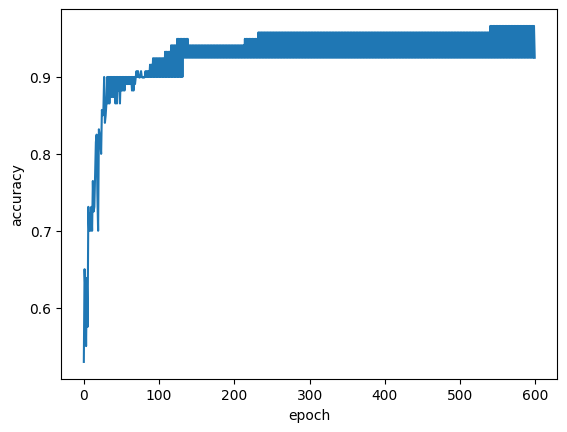

In [20]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

그래프를 보았을 때, 백번째 에포크 이후로 훈련세트와 테스트 세트의 점수가 조금식 벌어지고 있다. 또한 에포크 초기에는 과소적합되어 훈련 세트와 테스트세트의 점수가 낮다 그래프를 보았을 때, 반복횟수를 100으로 맞추고 훈련하는 것이 적합해 보인다.

In [21]:
sc = SGDClassifier(loss='log', max_iter = 100, tol=None, random_state=42)  ##에포크 횟수를 100으로 지정
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


에포크 횟수를 100으로 지정했을 때, 정확도 점수가 비교적 높게 보인다.